In [65]:
import os
import datetime
from collections import Counter
from tqdm import tqdm
import numpy as np
from src.plotters import line_plot, scatter_plot
from src.helpers import str_to_datetime, get_project_dir
from src.aggregators import collector
import warnings
warnings.filterwarnings("ignore")

In [2]:
PROJECT_PATH = get_project_dir()
PATH_TO_DATA = os.path.join(PROJECT_PATH, 'data/preprocessed')

In [3]:
print('+'+'-'*60)
print('| Collecting tokens ...')
items = collector(path=PATH_TO_DATA,
                  filename='main.csv',
                  chunksize=200000,
                  n_rows=19291934,
                  columns_to_process = ['date_parsed'],
                  renamed_columns = ['date_parsed'],
                  prep_f=None)
print('| Done ')
print('+'+'-'*60)

+------------------------------------------------------------
| Collecting tokens ...


CHUNKS: 100%|██████████| 97/97 [01:24<00:00,  1.14it/s]

| Done 
+------------------------------------------------------------


In [4]:
items = list(tqdm(map(str_to_datetime, items['items'].values[0]), total=len(items['items'].values[0])))

100%|██████████| 19291933/19291933 [03:59<00:00, 80478.74it/s]


In [7]:
counts = Counter(items)

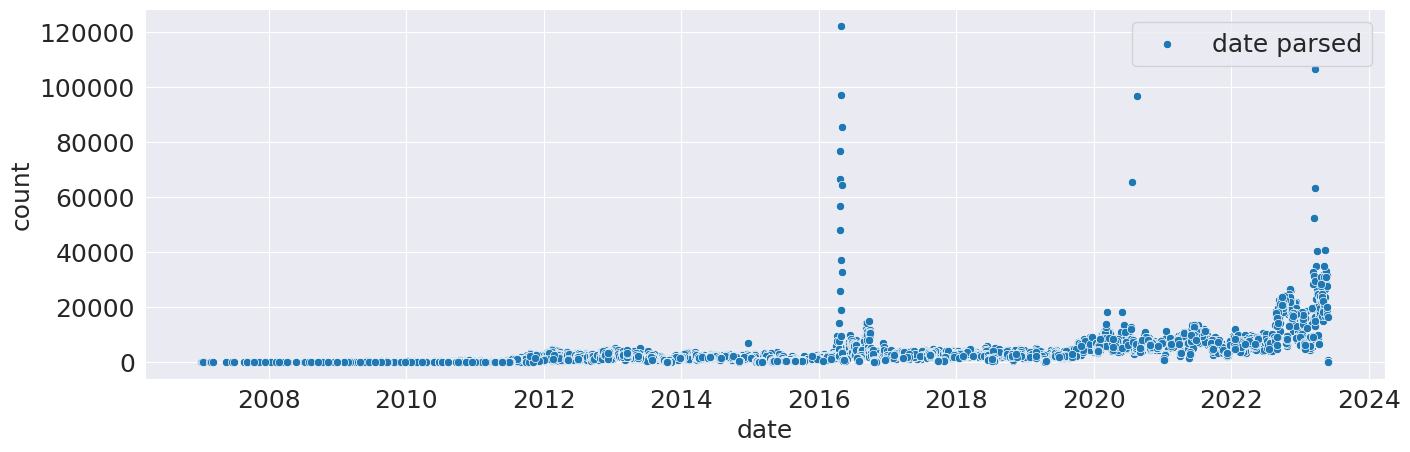

In [62]:
scatter_plot(x=counts.keys(), y=np.array(list(counts.values())), lw=3,
          x_label='date', y_label='count', labels=['date parsed'], aspect_ratio=0.3)

In [43]:
import pandas as pd
df = pd.DataFrame(columns=['date','count'])
df['date'] = list(counts.keys())
df['count'] = list(counts.values())
df = df.sort_values(by='count', ascending=False)

In [85]:
dates_to_remove1 = df[df['date'] < datetime.datetime.strptime('2016/05/29', '%Y/%m/%d')][df['count'] > 14000]['date'] \
                    .apply(lambda x: x.strftime('%Y/%m/%d')).tolist()
df[df['date'] < datetime.datetime.strptime('2016/05/29', '%Y/%m/%d')][df['count'] > 14000]

,date,count
1651,2016-04-29,122231
1650,2016-04-30,97003
1654,2016-05-01,85594
1644,2016-04-22,76638
1646,2016-04-23,66643
1655,2016-05-02,64352
1648,2016-04-25,56565
1647,2016-04-24,48037
1652,2016-04-28,36920
1657,2016-05-03,32840


In [84]:
dates_to_remove2 = df[df['date'] > datetime.datetime.strptime('2017', '%Y')][df['date'] < datetime.datetime.strptime('2021', '%Y')][df['count'] > 40000]['date'] \
                    .apply(lambda x: x.strftime('%Y/%m/%d')).tolist()
df[df['date'] > datetime.datetime.strptime('2017', '%Y')][df['date'] < datetime.datetime.strptime('2021', '%Y')][df['count'] > 40000]

,date,count
3312,2020-08-18,96607
3039,2020-07-23,65627


In [83]:
dates_to_remove3 = df[df['date'] > datetime.datetime.strptime('2022', '%Y')][df['count'] > 40000]['date'] \
                    .apply(lambda x: x.strftime('%Y/%m/%d')).tolist()
df[df['date'] > datetime.datetime.strptime('2022', '%Y')][df['count'] > 40000]

,date,count
3962,2023-03-19,106617
4032,2023-03-20,63290
4033,2023-03-15,52362
3895,2023-03-14,52344
4699,2023-05-14,40628
3874,2023-03-30,40320


In [87]:
dates_to_remove = dates_to_remove1 + dates_to_remove2 + dates_to_remove3
dates_to_remove

['2016/04/29',
 '2016/04/30',
 '2016/05/01',
 '2016/04/22',
 '2016/04/23',
 '2016/05/02',
 '2016/04/25',
 '2016/04/24',
 '2016/04/28',
 '2016/05/03',
 '2016/04/21',
 '2016/04/26',
 '2016/04/20',
 '2020/08/18',
 '2020/07/23',
 '2023/03/19',
 '2023/03/20',
 '2023/03/15',
 '2023/03/14',
 '2023/05/14',
 '2023/03/30']

In [101]:
df_removed = df.set_index('date').loc[dates_to_remove].reset_index()
df_new = df.set_index('date').loc[[v for v in df['date'] if v not in dates_to_remove]].reset_index()

In [99]:
len(df_new), len(df_removed)

(4720, 21)

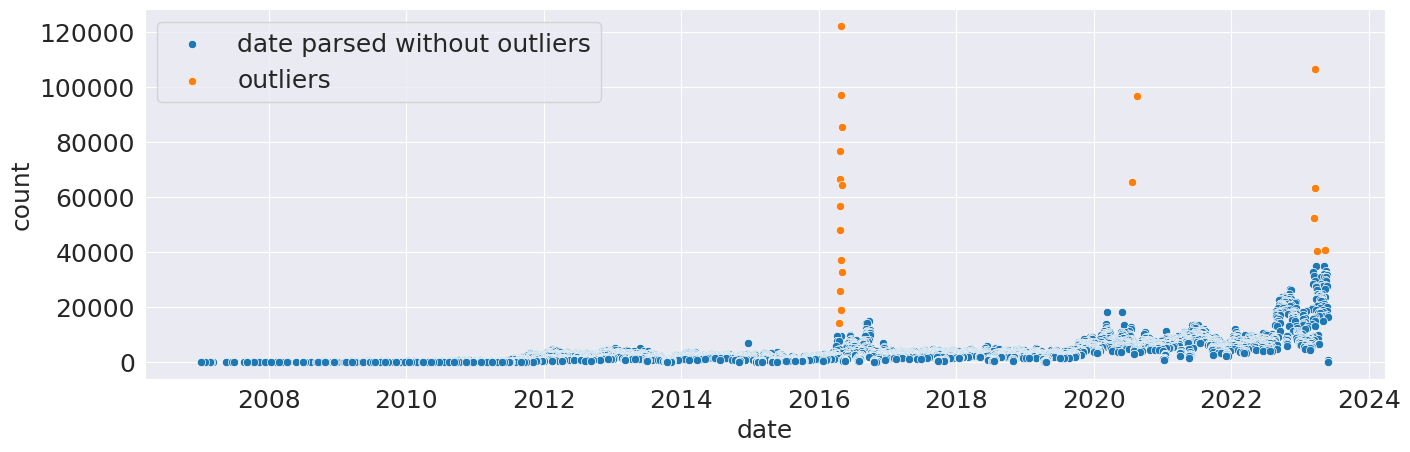

In [102]:
scatter_plot(x=[df_new['date'], df_removed['date']], y=[df_new['count'], df_removed['count']], lw=3,
          multiple=True,
          x_label='date', y_label='count', labels=['date parsed without outliers', 'outliers'], aspect_ratio=0.3)